Simple 4-step Jupyter notebook to plot graphs of variable y as a function of variable x. There are options for plotting x-and y-data linearly or logarithmically. This is useful for analysing exponential or power law relationships.

Step 1: Import various program modules

Step 2: Input the histogram data

Step 3: Evaluate the errors

Step 4: Plot the histogram


In [1]:
# import useful modules

import math                                     # This will import math module
import matplotlib.pyplot as plt                 # This will import plotting module
import math
import numpy as np
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar
from numpy import exp

In [2]:
# define variables and values for data

xvalue = [1.0,2.0,3.0,4.0,5.5,6.4,7.3,8.2,9.1,10.0]             # list of x-values to be plotted
yvalue = [50.3,20.5,18.0,22.1,23.3,70.2,20.1,20.5,0.0,0.0]      # list of y-values to be plotted 
outputfile = 'Graph1.pdf'                                       # set output filename

datapoints=len(yvalue)                                          # calculate number of data points
yerror  = np.array([ x + 1 for x in range(datapoints) ],'f')    # array for y-error values (to be calculated later)

In [3]:
# Evaluate the errors in the y-data, assuming Poisson statistics

count=0     
while count < datapoints:
    yerror[count] = math.sqrt(yvalue[count])           # Poisson statistics gives error=sqrt(counts)
    count += 1    

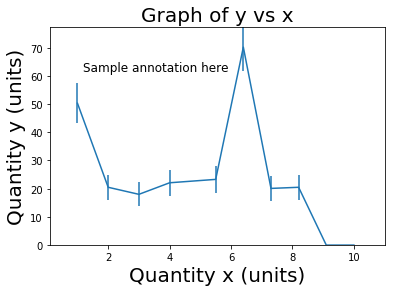

In [4]:
# Plot the data

figuretitle   = 'Graph of y vs x'                      # set title for the graph
xlabeltext    = "Quantity x (units)"                   # set x-axis label
ylabeltext    = "Quantity y (units)"                   # set y-axis label
annotatetext1 = "Sample annotation here"               # set text for annotation 1
plt.xscale('linear')                                   # choose 'log' or 'linear' for xscale
plt.yscale('linear')                                   # choose 'log' or 'linear' for yscale
plt.rcParams['font.family'] = 'DejaVu Sans'            # set font style for labels 
plt.rcParams["figure.figsize"] = (8,6)                 # set figure size (x,y) in inches

# select plotting symbols

symbol='g.'       # choose colour and symbol for data points ('r.', 'go', 'bD', etc.)

# find minimum and maximum x- and y-values in the data to be plotted

xcountsmin=min(xvalue)
xcountsmax=max(xvalue)
ycountsmin=min(yvalue)
ycountsmax=max(yvalue)

# set minimum and maximum scales for x- and y-axes

xplotmin = xcountsmin*0.1       # set non-zero value to avoid error if logarithmic y-axis chosen
xplotmax = xcountsmax + 1
yplotmin = 0.1                  # set non-zero value to avoid error if logarithmic y-axis chosen
yplotmax = ycountsmax*1.1

# set location for annotation

annotatexposition1 = xplotmin+0.1*(xplotmax-xplotmin) # use fraction between 0 and 1 to ensure position is within plot area
annotateyposition1 = yplotmin+0.8*(yplotmax-yplotmin) # use fraction between 0 and 1 to ensure position is within plot area

# plot and save the graph

plt.axis([xplotmin,xplotmax,yplotmin,yplotmax])                                     # plot the graph axes
plt.xlabel(xlabeltext,fontsize=20)                                                  # add label for x-axis
plt.ylabel(ylabeltext,fontsize=20)                                                  # add label for y-axis
plt.title(figuretitle, fontsize=20)                                                 # add figure title
plt.annotate(annotatetext1,xy=(annotatexposition1,annotateyposition1),fontsize=12)  # Sample annotation of graph
plt.errorbar(xvalue, yvalue, yerr=yerror)                                           # plot data and y-errorbars
plt.savefig(outputfile,bbox_inches = 'tight')                                       # write out spectra to outputfile
plt.show()